## Initial Golf Swings

Lets look through our first set of swings provided

In [1]:
#| include: false

from fastai.vision.all import *
from utils import *

In [2]:
#| include: false
all_file_paths = get_files('../../../data')

swing_paths = [fp for fp in all_file_paths if str(fp).split('/')[-1][-3:] == 'mp4']
full_vid_paths = [fp for fp in all_file_paths if str(fp).split('/')[-1][-3:] != 'mp4']
swing_meta = [str(swing_paths[x]).split('.')[-2].split('/')[-1] for x in range(len(swing_paths))]

In [3]:
#| echo: false
print(f'There are a total of {len(swing_paths)} swings available from {len(full_vid_paths)} full videos available')

There are a total of 85 swings available from 13 full videos available


In [4]:
#| include: false
print(f'The path to a full video looks like: {full_vid_paths[0]}')
print(f'The path to a full video looks like: {swing_paths[0]}')

The path to a full video looks like: ../../../data/img_0849/IMG_0849.MOV
The path to a full video looks like: ../../../data/img_0849/IMG_0849_swing_14_score_2.mp4


In [5]:
#| echo: false
# Lets create a dataframe that will house our labels for these videos
video_origin = [('_').join(swing_meta[x].split('_')[:2]) for x in range(len(swing_paths))]
og_vid_num = [swing_meta[x].split('_')[1] for x in range(len(swing_paths))]
swing = [swing_meta[x].split('_')[3] for x in range(len(swing_paths))]
score = [swing_meta[x].split('_')[-1] for x in range(len(swing_paths))]
swing_dict = {'origin_video': video_origin,
              'swing_index': swing,
              'score': score,
              'og_vid_num': og_vid_num}
swing_df = pd.DataFrame(swing_dict)

In [6]:
#| echo: false
print("Here's a random selection of swings")
swing_df.sample(5)

Here's a random selection of swings


,origin_video,swing_index,score,og_vid_num
2,IMG_0849,2,5,0849
17,IMG_0848,1,5,0848
16,IMG_0848,2,5,0848
50,IMG_0860,2,5,0860
48,IMG_0860,0,5,0860


## Lets see the distribution of scores between all our swings and make sure things aren't too badly skewed

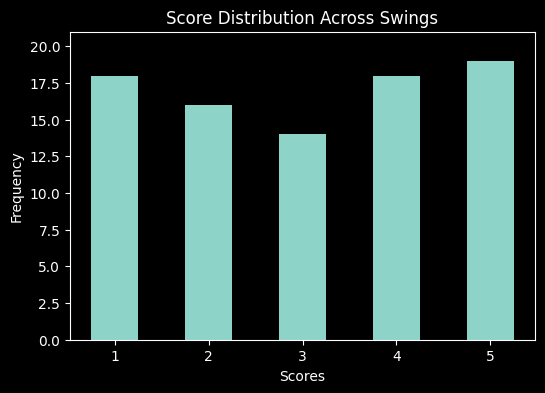

In [7]:
#| echo: false
plt_hist_score(swing_df.score)

In [8]:
#| echo: false
print(f'The raw values per score are: {dict(swing_df.score.value_counts())}')

The raw values per score are: {'5': 19, '4': 18, '1': 18, '2': 16, '3': 14}


### Looks like an acceptable distribution of scores to get started -- normally would want to see the 3 score as the most sampled but this is ok

## Was there a skew as the swings progressed?

In [9]:
#| console: false
print(f'just to check that video {swing_df.og_vid_num.value_counts().sort_index().index[6]} is the midpoint of swings')
print(f'There are {swing_df.og_vid_num.value_counts().sort_index()[:6].values.sum()} swings before video 0855')
print(f'There are {swing_df.og_vid_num.value_counts().sort_index()[6:].values.sum()} swings from video 0855')

just to check that video 0855 is the midpoint of swings
There are 43 swings before video 0855
There are 42 swings from video 0855


In [13]:
#| include: false
first_half_swings = swing_df[swing_df.og_vid_num.map(lambda x: int(x) < 855)]
second_half_swings = swing_df[swing_df.og_vid_num.map(lambda x: int(x) >= 855)]
first_half_swings.shape, second_half_swings.shape

((43, 4), (42, 4))

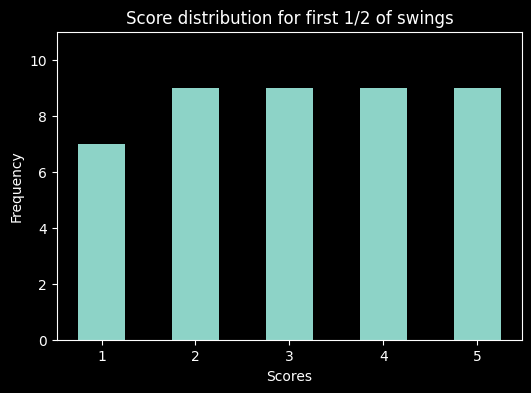

In [11]:
#| echo: false
plt_hist_score(first_half_swings.score, title='Score distribution for first 1/2 of swings')

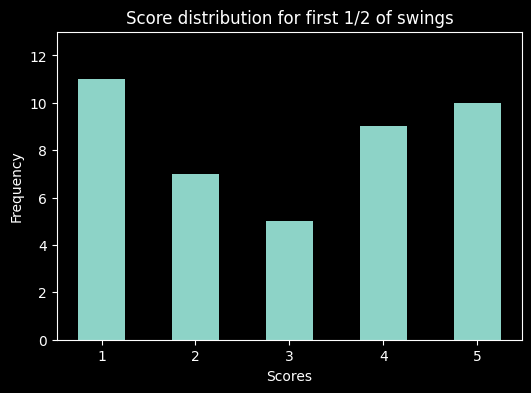

In [12]:
#| echo: false
plt_hist_score(second_half_swings.score, title='Score distribution for first 1/2 of swings')

## Looks like as the session progressed a skew is seen in the distribution of swings -- is this natural/expected?  
### -- Maybe from the player getting tired and it's either hit or miss 
### -- Or maybe internally they changed the way they were scoring things --> worth keeping in mind